# 校友数据分析

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
# 读取 Excel
data = pd.read_excel('/Users/mz/Downloads/Alumni/录入数据(python).xlsx')

In [245]:
df = pd.DataFrame(data)
df[:200]

,分类,地区,地区人数,专业,专业人数,领域,领域人数,公司,公司人数
0,全球,中国,26413.0,工商管理,1841.0,研究,2448,中国农业大学,420.0
1,全球,美国,3319.0,食品科学与工程,1726.0,运营,2276,字节跳动,71.0
2,全球,英国,450.0,计算机科学,1371.0,销售,1904,百度,46.0
3,全球,加拿大,455.0,经济学,1232.0,工程,1894,中国科学院,45.0
4,全球,澳大利亚,328.0,金融学,1072.0,教育,1874,华为,42.0
...,...,...,...,...,...,...,...,...,...
130,日新,NaN,NaN,机械工程,7.0,产品管理,5,Diopsys眼科,1.0
131,日新,NaN,NaN,植物保护与病虫害综合治理,7.0,艺术和设计,5,KKday旅游,1.0
132,日新,NaN,NaN,计算机科学,7.0,咨询,5,比特大陆,1.0
133,日新,NaN,NaN,传播学,6.0,财务/金融,4,安永,1.0


In [246]:
#查看数据概览：
df.head

<bound method NDFrame.head of      分类    地区     地区人数            专业    专业人数     领域  领域人数         公司   公司人数
0    全球    中国  26413.0          工商管理  1841.0     研究  2448     中国农业大学  420.0
1    全球    美国   3319.0       食品科学与工程  1726.0     运营  2276       字节跳动   71.0
2    全球    英国    450.0         计算机科学  1371.0     销售  1904         百度   46.0
3    全球   加拿大    455.0           经济学  1232.0     工程  1894      中国科学院   45.0
4    全球  澳大利亚    328.0           金融学  1072.0     教育  1874         华为   42.0
..   ..   ...      ...           ...     ...    ...   ...        ...    ...
130  日新   NaN      NaN          机械工程     7.0   产品管理     5  Diopsys眼科    1.0
131  日新   NaN      NaN  植物保护与病虫害综合治理     7.0  艺术和设计     5    KKday旅游    1.0
132  日新   NaN      NaN         计算机科学     7.0     咨询     5       比特大陆    1.0
133  日新   NaN      NaN           传播学     6.0  财务/金融     4        安永     1.0
134  日新   NaN      NaN           NaN     NaN   人力资源     4        毕马威    1.0

[135 rows x 9 columns]>

In [247]:
#查看数据信息：
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   分类      135 non-null    object 
 1   地区      44 non-null     object 
 2   地区人数    44 non-null     float64
 3   专业      114 non-null    object 
 4   专业人数    114 non-null    float64
 5   领域      135 non-null    object 
 6   领域人数    135 non-null    int64  
 7   公司      132 non-null    object 
 8   公司人数    132 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 9.6+ KB


In [248]:
#查看数据信息：
df.describe()

,地区人数,专业人数,领域人数,公司人数
count,44.000000,114.000000,135.000000,132.000000
mean,1507.613636,255.552632,307.059259,20.590909
std,4531.523139,384.660294,542.446376,51.809097
min,84.000000,6.000000,4.000000,1.000000
25%,163.000000,26.500000,16.000000,4.750000
50%,328.000000,86.500000,52.000000,8.000000
75%,577.000000,346.000000,353.500000,26.250000
max,26413.000000,1841.000000,2448.000000,420.000000


In [249]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of      分类    地区     地区人数            专业    专业人数     领域  领域人数         公司   公司人数
0    全球    中国  26413.0          工商管理  1841.0     研究  2448     中国农业大学  420.0
1    全球    美国   3319.0       食品科学与工程  1726.0     运营  2276       字节跳动   71.0
2    全球    英国    450.0         计算机科学  1371.0     销售  1904         百度   46.0
3    全球   加拿大    455.0           经济学  1232.0     工程  1894      中国科学院   45.0
4    全球  澳大利亚    328.0           金融学  1072.0     教育  1874         华为   42.0
..   ..   ...      ...           ...     ...    ...   ...        ...    ...
130  日新   NaN      NaN          机械工程     7.0   产品管理     5  Diopsys眼科    1.0
131  日新   NaN      NaN  植物保护与病虫害综合治理     7.0  艺术和设计     5    KKday旅游    1.0
132  日新   NaN      NaN         计算机科学     7.0     咨询     5       比特大陆    1.0
133  日新   NaN      NaN           传播学     6.0  财务/金融     4        安永     1.0
134  日新   NaN      NaN           NaN     NaN   人力资源     4        毕马威    1.0

[135 rows x 9 columns]>

In [250]:
"本次校友研究共收录{}个分类维度，{}个专业，{}个领域，{}家公司，{}行数据".format(df.分类.nunique(), df.专业.nunique(), df.领域.nunique(), df.公司.nunique(),len(df))

'本次校友研究共收录9个分类维度，40个专业，22个领域，104家公司，135行数据'

In [251]:
"文章分析维度包括：{}".format(df.分类.unique())

"文章分析维度包括：['全球' '中国' '海外' '美加' '美东' '美西' '欧洲' '澳洲' '日新']"

In [252]:
#去除nan后再看

#每个地区挑出前15名的专业，在所有上榜专业中，专业总受欢迎程度详情为：
#食品、经济、金融是在每个地区中均出现的专业，其次是工商管理、计算机科学、传播学、兽医学。
#出现次数最少的专业是农学，植物保护与病虫害综合治理，生物化学与分子生物学，化学，机械工程。


from collections import Counter
counts = Counter(df.专业)
counts.most_common(20)
# [('America/New_York', 1251),
#  ('', 521),
#  ('America/Chicago', 400),
#  ('America/Los_Angeles', 382),
#  ('America/Denver', 191),
#  ('Europe/London', 74),
#  ('Asia/Tokyo', 37),
#  ('Pacific/Honolulu', 36),
#  ('Europe/Madrid', 35),
#  ('America/Sao_Paulo', 33)]

[(nan, 21),
 ('食品科学与工程', 8),
 ('经济学', 8),
 ('金融学', 8),
 ('工商管理', 7),
 ('计算机科学', 7),
 ('传播学', 7),
 ('兽医学', 7),
 ('生物学', 6),
 ('动物学', 5),
 ('数学', 5),
 ('会计学', 4),
 ('市场营销', 4),
 ('统计学', 4),
 ('电气与电子工程', 3),
 ('农学', 2),
 ('植物保护与病虫害综合治理', 2),
 ('生物化学与分子生物学', 2),
 ('化学', 2),
 ('机械工程', 2)]

In [253]:
#看前10行
df['专业'][:10]

0       工商管理
1    食品科学与工程
2      计算机科学
3        经济学
4        金融学
5        生物学
6        会计学
7        传播学
8       市场营销
9        兽医学
Name: 专业, dtype: object

In [272]:
##展示所有专业，每个专业出现几次，求前10受欢迎专业
major_counts = df['专业'].value_counts()
major_counts[:10]

专业
经济学        8
金融学        8
食品科学与工程    8
工商管理       7
计算机科学      7
传播学        7
兽医学        7
生物学        6
动物学        5
数学         5
Name: count, dtype: int64

Text(0.5, 1.0, '专业受欢迎程度表')

/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from current font.
  func(*args, **kwargs)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 27982 (\N{CJK UNIFIED IDEOGRAPH-6D4E}) missing from current font.
  func(*args, **kwargs)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  func(*args, **kwargs)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  func(*args, **kwargs)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 34701 (\N{CJK UNIFIED IDEOGRAPH-878D}) missing from current font.
  func(*args, **kwargs)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93:

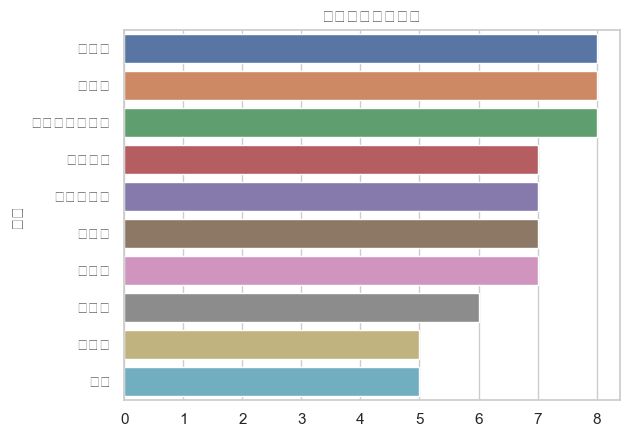

In [273]:
subset = 专业_counts[:10]
sns.barplot(y = subset.index, x = subset.values)
plt.title("专业受欢迎程度表")

In [277]:
#在各地区出现公司次数最多的公司：
df.公司.value_counts()[:8]

公司
亚马逊              5
谷歌               4
脸书               3
哈佛医学院            3
中国农业大学           2
雀巢               2
美国奥本大学           2
美国内布拉斯加大学林肯分校    2
Name: count, dtype: int64

In [278]:
#怎么将select出每个分类下的？

In [294]:
frame.地区

0        中国
1        美国
2        英国
3       加拿大
4      澳大利亚
       ... 
130     NaN
131     NaN
132     NaN
133     NaN
134     NaN
Name: 地区, Length: 135, dtype: object

In [295]:
#显示去掉na后的地区列，频次最高的值
frame.地区.dropna()
df.地区.value_counts()[:10]

地区
日本      3
英国      3
加拿大     3
澳大利亚    3
荷兰      3
新加坡     3
德国      3
法国      3
丹麦      3
美国      3
Name: count, dtype: int64

In [301]:
#只显示地区不为空的行，此处无用
cframe = frame[frame.地区.notnull()]
cframe

,分类,地区,地区人数,专业,专业人数,领域,领域人数,公司,公司人数
0,全球,中国,26413.0,工商管理,1841.0,研究,2448,中国农业大学,420.0
1,全球,美国,3319.0,食品科学与工程,1726.0,运营,2276,字节跳动,71.0
2,全球,英国,450.0,计算机科学,1371.0,销售,1904,百度,46.0
3,全球,加拿大,455.0,经济学,1232.0,工程,1894,中国科学院,45.0
4,全球,澳大利亚,328.0,金融学,1072.0,教育,1874,华为,42.0
5,全球,荷兰,288.0,生物学,934.0,业务开发,1577,亚马逊,41.0
6,全球,新加坡,163.0,会计学,624.0,信息技术,1069,拜耳,41.0
7,全球,德国,231.0,传播学,549.0,财务/金融,761,瓦格宁根大学,39.0
8,全球,日本,103.0,市场营销,537.0,计划和项目管理,696,联想,39.0
9,全球,法国,93.0,兽医学,514.0,市场营销,677,先正达种业,39.0


In [304]:
# #也许可以填充成欧洲？
# frame['os'] = np.where(cframe['种类'].str.contains('全球'))

/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  

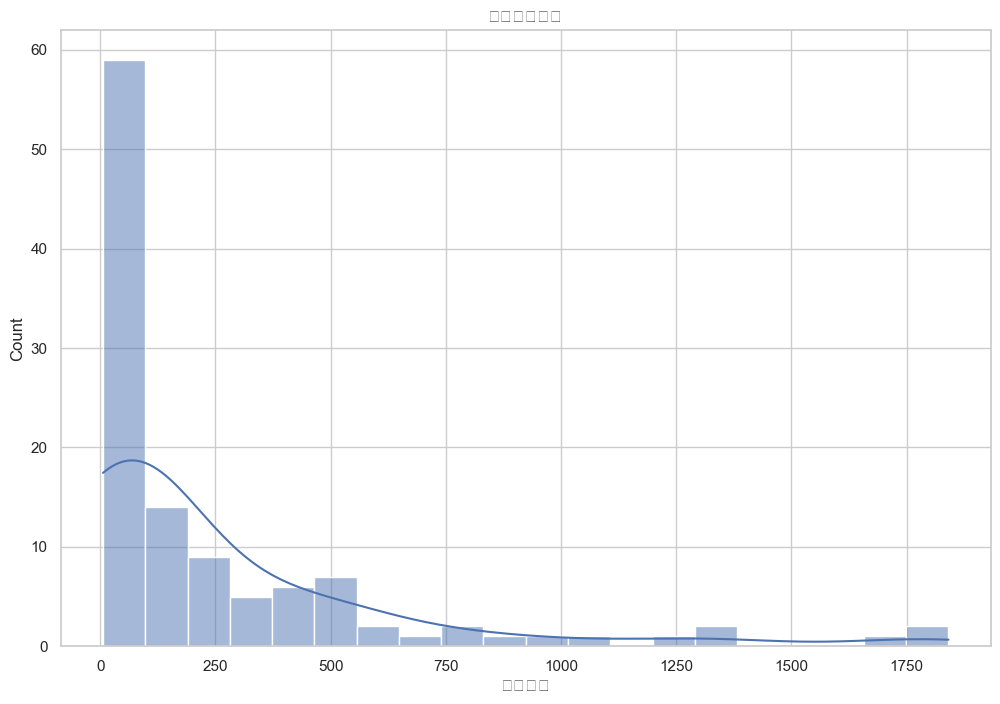

In [127]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(dataset['专业人数'], bins=20, kde=True)
plt.title('专业人数分布')
plt.show()

/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  

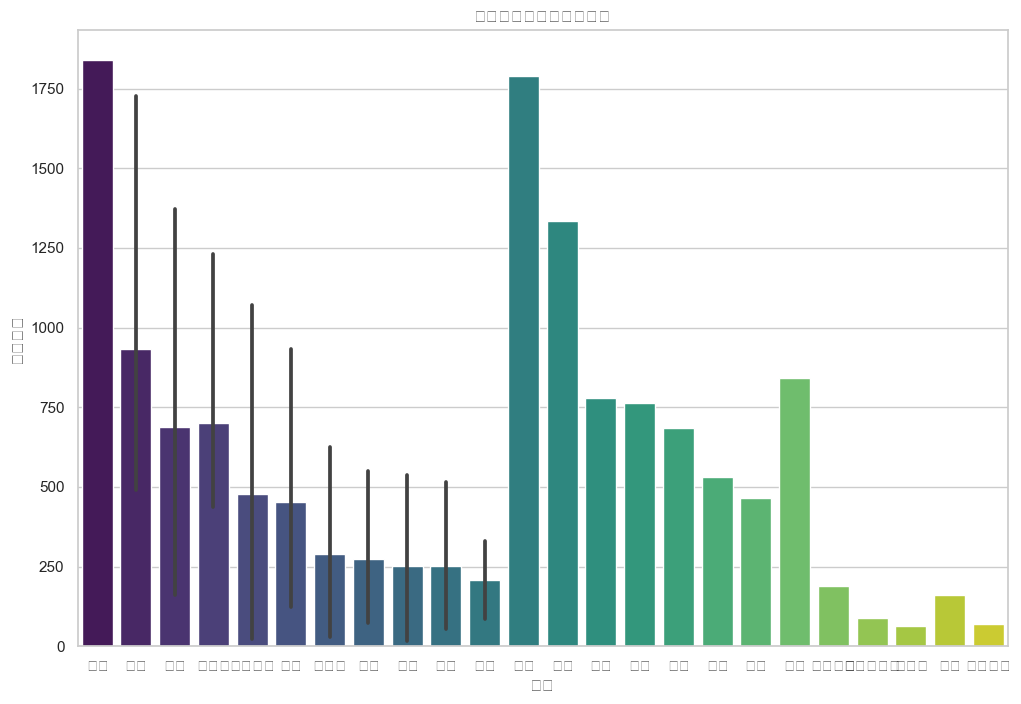

In [126]:
# 不同地区的专业人数对比
plt.figure(figsize=(12, 8))
sns.barplot(x='地区', y='专业人数', data=dataset, palette='viridis')
plt.title('不同地区的专业人数对比')
plt.show()




/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30740 (\N{CJK UNIFIED IDEOGRAPH-7814}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31350 (\N{CJK UNIFIED IDEOGRAPH-7A76}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36816 (\N{CJK UNIFIED IDEOGRAPH-8FD0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33829 (\N{CJK UNIFIED IDEOGRAPH-8425}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  

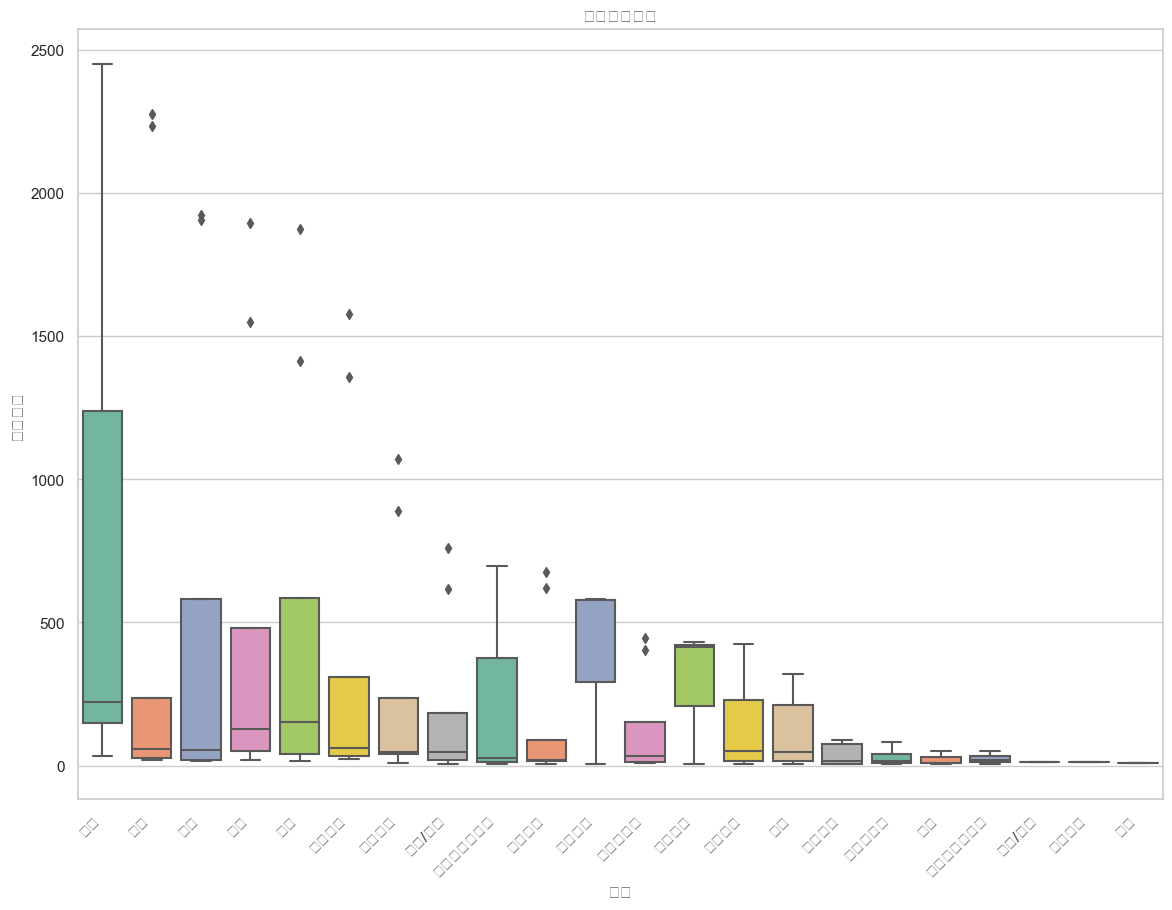

In [128]:
# 领域人才分布
plt.figure(figsize=(14, 10))
sns.boxplot(x='领域', y='领域人数', data=dataset, palette='Set2')
plt.title('领域人才分布')
plt.xticks(rotation=45, ha='right')
plt.show()

In [49]:
# 读取 Excel 文件中的所有 sheet 页，sheet_name=None 表示读取所有 sheet 页
dataset = pd.read_excel('/Users/mz/Downloads/Alumni/录入数据(python).xlsx', sheet_name=None)

# 遍历所有 sheet 页，并打印数据
for sheet_name, df in dataset.items():
    print(f"Sheet: {sheet_name}")
    print(df)
    print("\n" + "-"*30 + "\n")  # 用分隔线隔开不同的 sheet 页

Sheet: 全球
    分类    地区     地区人数       专业    专业人数       领域  领域人数      公司  公司人数
0   全球    中国  26413.0     工商管理  1841.0       研究  2448  中国农业大学   420
1   全球    美国   3319.0  食品科学与工程  1726.0       运营  2276    字节跳动    71
2   全球    英国    450.0    计算机科学  1371.0       销售  1904      百度    46
3   全球   加拿大    455.0      经济学  1232.0       工程  1894   中国科学院    45
4   全球  澳大利亚    328.0      金融学  1072.0       教育  1874      华为    42
5   全球    荷兰    288.0      生物学   934.0     业务开发  1577     亚马逊    41
6   全球   新加坡    163.0      会计学   624.0     信息技术  1069      拜耳    41
7   全球    德国    231.0      传播学   549.0    财务/金融   761  瓦格宁根大学    39
8   全球    日本    103.0     市场营销   537.0  计划和项目管理   696      联想    39
9   全球    法国     93.0      兽医学   514.0     市场营销   677   先正达种业    39
10  全球    丹麦     84.0      动物学   410.0     人力资源   577      腾讯    36
11  全球   NaN      NaN  电气与电子工程   355.0    媒体与传播   446    玛氏食品    34
12  全球   NaN      NaN      NaN     NaN     产品管理   430    嘉吉食品    34
13  全球   NaN      NaN      NaN     NaN

In [54]:
#查看数据概览：
for sheet_name, df in dataset.items():
    print(f"Sheet: {sheet_name}")
    print(df.head())  # 查看每个 sheet 页的前几行数据
    print("\n" + "-"*30 + "\n")

Sheet: 全球
   分类    地区     地区人数       专业    专业人数  领域  领域人数      公司  公司人数
0  全球    中国  26413.0     工商管理  1841.0  研究  2448  中国农业大学   420
1  全球    美国   3319.0  食品科学与工程  1726.0  运营  2276    字节跳动    71
2  全球    英国    450.0    计算机科学  1371.0  销售  1904      百度    46
3  全球   加拿大    455.0      经济学  1232.0  工程  1894   中国科学院    45
4  全球  澳大利亚    328.0      金融学  1072.0  教育  1874      华为    42

------------------------------

Sheet: 中国
   分类  地区     地区人数       专业    专业人数  领域  领域人数      公司   公司人数
0  中国  北京  15587.0     工商管理  1789.0  运营  2234  中国农业大学  420.0
1  中国  上海   1579.0  食品科学与工程  1333.0  销售  1921    字节跳动   64.0
2  中国  广东   1301.0      金融学   778.0  工程  1547      百度   44.0
3  中国  山东   1011.0    计算机科学   764.0  研究  1469   中国科学院   43.0
4  中国  江苏    658.0      经济学   686.0  教育  1412      腾讯   34.0

------------------------------

Sheet: 海外
   分类    地区    地区人数       专业   专业人数    领域  领域人数        公司  公司人数
0  海外    美国  3319.0      经济学  581.0    研究  1239  荷兰瓦格宁根大学  37.0
1  海外    英国   450.0    计算机科学  532.0   

In [56]:
# #查看数据信息：
# for sheet_name, df in dataset.items():
#     print(f"Sheet: {sheet_name}")
#     print(df.info())  # 查看每个 sheet 页的数据信息
#     print("\n" + "-"*30 + "\n")

Sheet: 全球
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   分类      15 non-null     object 
 1   地区      11 non-null     object 
 2   地区人数    11 non-null     float64
 3   专业      12 non-null     object 
 4   专业人数    12 non-null     float64
 5   领域      15 non-null     object 
 6   领域人数    15 non-null     int64  
 7   公司      15 non-null     object 
 8   公司人数    15 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.2+ KB
None

------------------------------

Sheet: 中国
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   分类      15 non-null     object 
 1   地区      8 non-null      object 
 2   地区人数    8 non-null      float64
 3   专业      13 non-null     object 
 4   专业人数    13 non-null     float64
 5   领域   

In [88]:
# #描述性统计信息：
# for sheet_name, df in dataset.items():
#     print(f"Sheet: {sheet_name}")
#     print(df.describe())  # 查看每个 sheet 页的描述性统计信息
#     print("\n" + "-"*30 + "\n")

Sheet: 全球
               地区人数         专业人数         领域人数        公司人数
count     11.000000    12.000000    15.000000   15.000000
mean    2902.454545   930.416667  1158.133333   65.866667
std     7853.037379   516.696404   752.517382   98.440603
min       84.000000   355.000000   319.000000   29.000000
25%      133.000000   531.250000   511.500000   35.000000
50%      288.000000   779.000000   761.000000   39.000000
75%      452.500000  1266.750000  1884.000000   43.500000
max    26413.000000  1841.000000  2448.000000  420.000000

------------------------------

Sheet: 中国
             地区人数         专业人数         领域人数       公司人数
count      8.0000    13.000000    15.000000   14.00000
mean    2720.6250   696.538462   985.000000   62.00000
std     5213.6492   433.883167   620.907516  103.64362
min      465.0000   279.000000   259.000000   15.00000
25%      587.0000   437.000000   497.000000   29.00000
50%      834.5000   531.000000   664.000000   33.00000
75%     1370.5000   778.000000  1440.500

In [ ]:
# # 查看数据基本信息
# print(data.info())

# # 描述性统计
# print(data.describe())

# # 可视化数据分布
# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 8))
# sns.histplot(data['专业人数'], bins=20, kde=True)
# plt.title('专业人数分布')
# plt.show()

# # 不同地区的专业人数对比
# plt.figure(figsize=(12, 8))
# sns.barplot(x='地区', y='专业人数', data=data, palette='viridis')
# plt.title('不同地区的专业人数对比')
# plt.show()

# # 领域人才分布
# plt.figure(figsize=(14, 10))
# sns.boxplot(x='领域', y='领域人数', data=data, palette='Set2')
# plt.title('领域人才分布')
# plt.xticks(rotation=45, ha='right')
# plt.show()

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED 

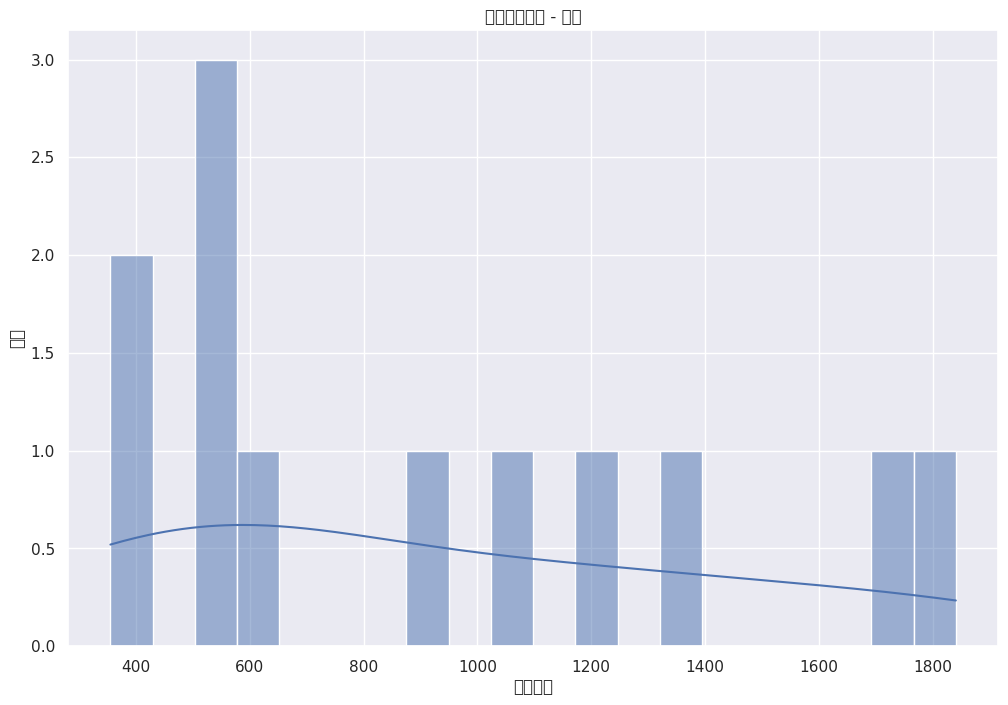

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED 

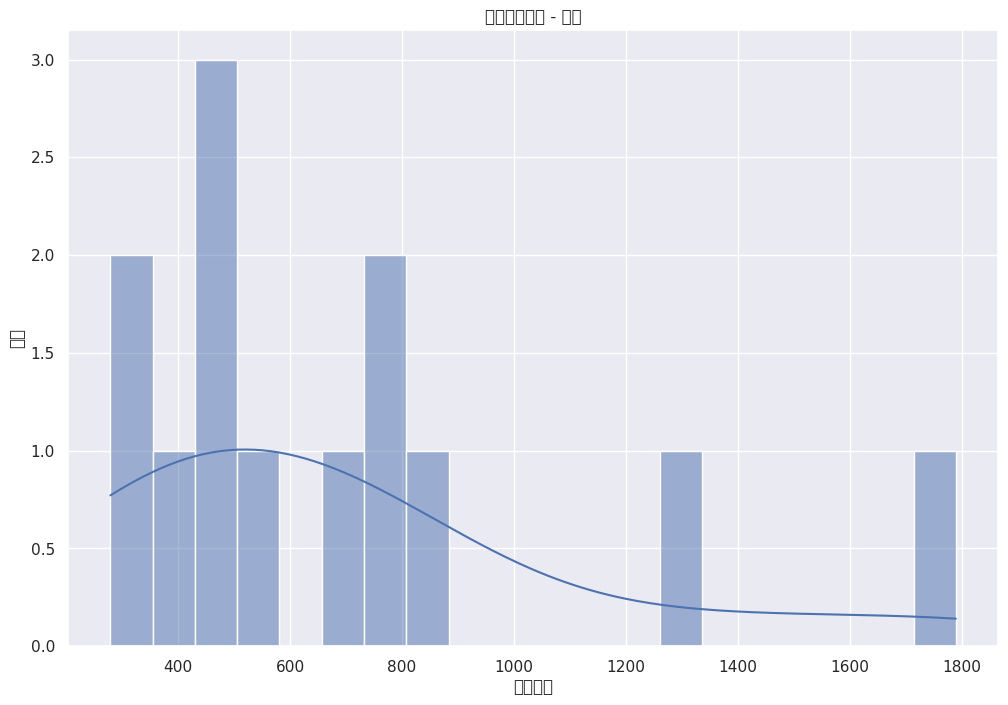

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-

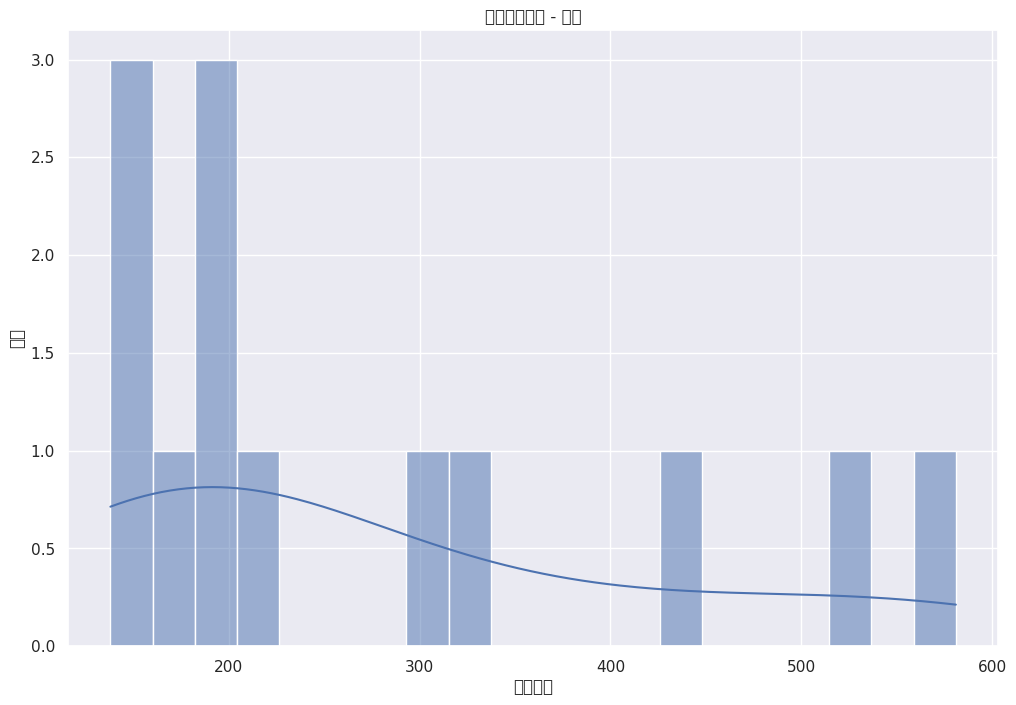

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152:

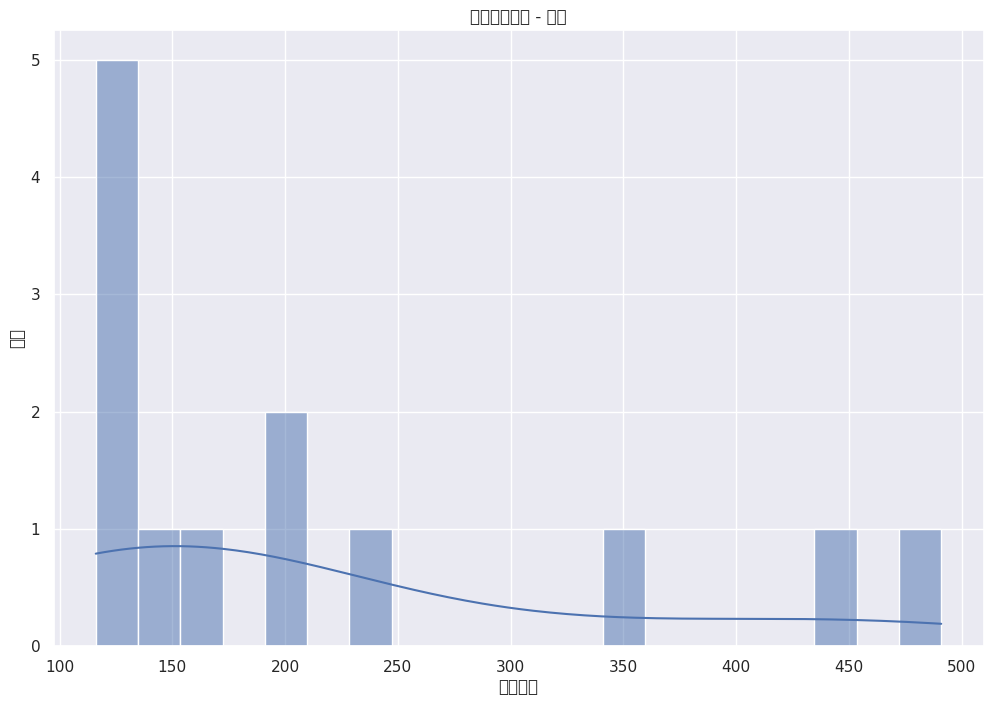

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font

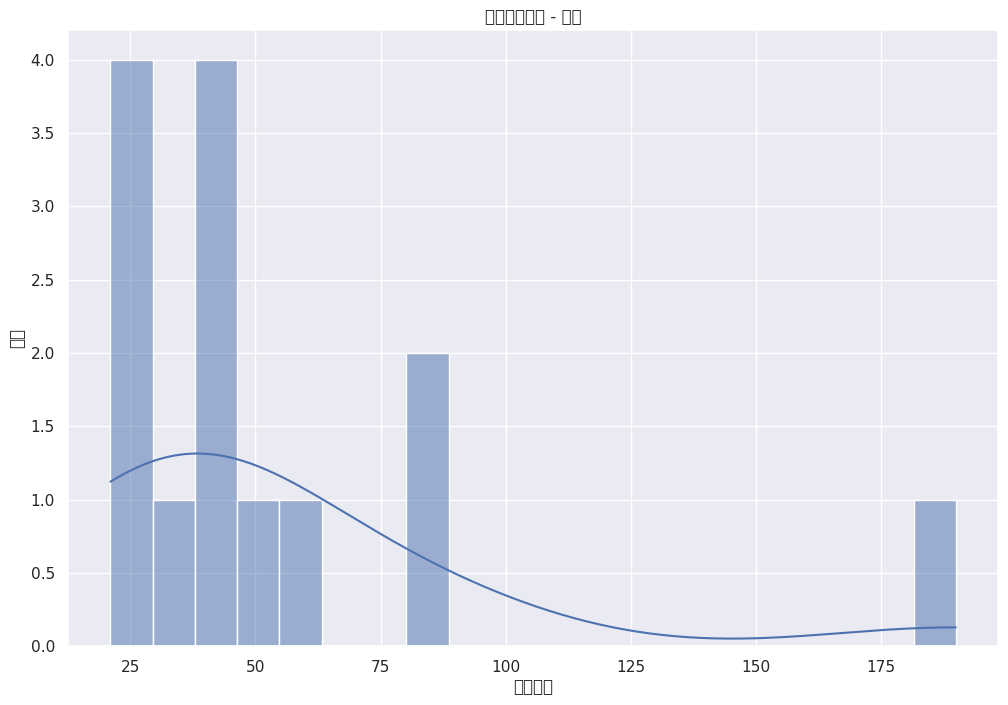

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED 

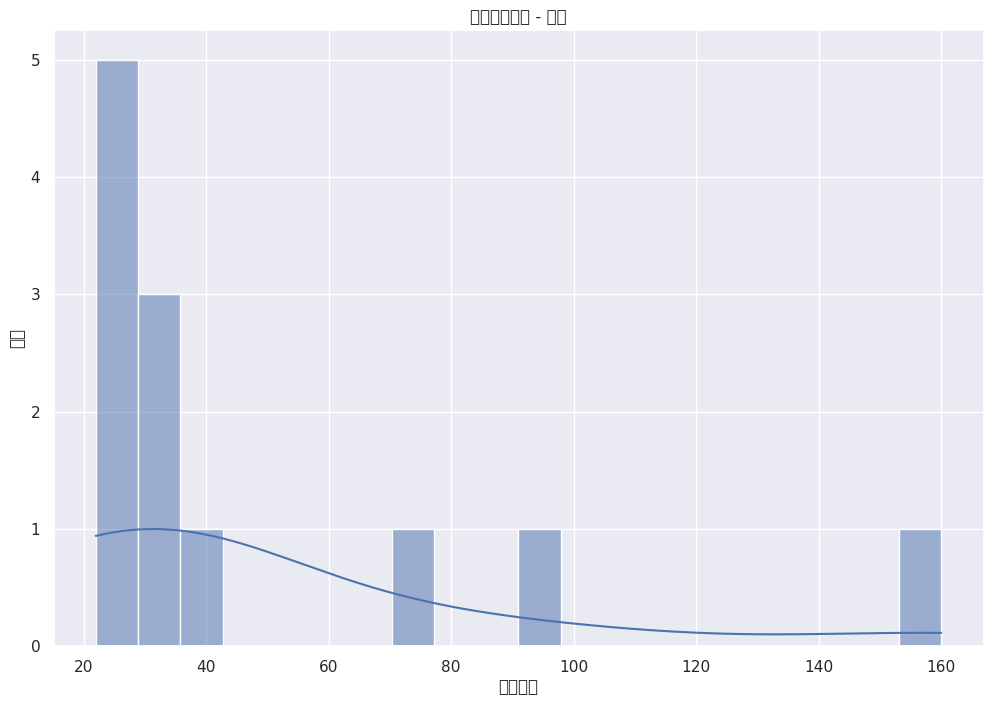

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font

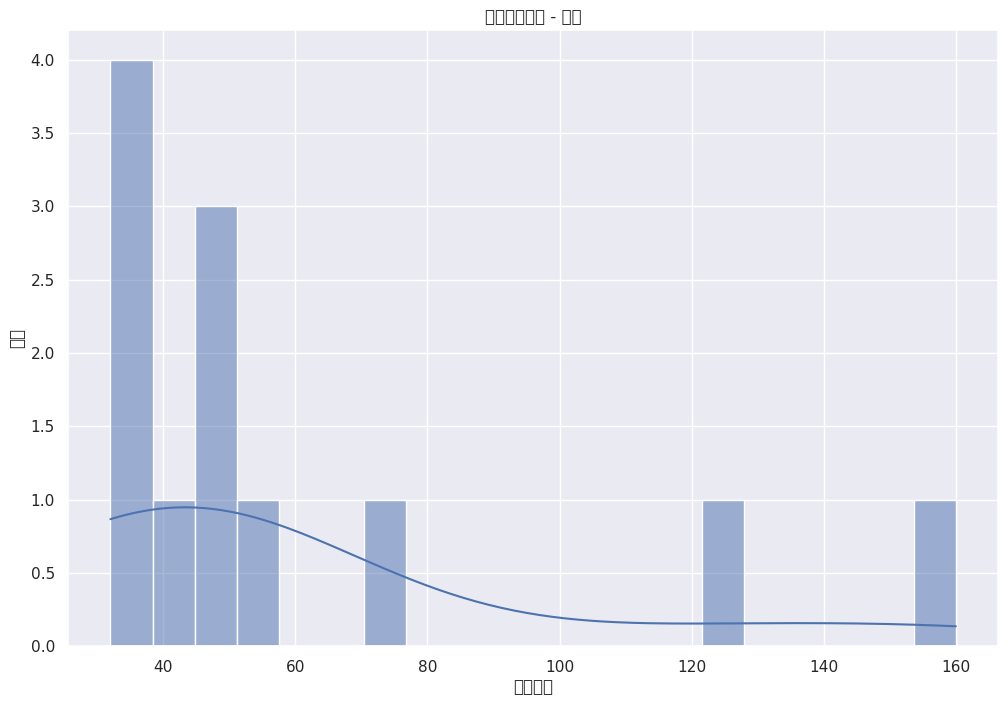

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED 

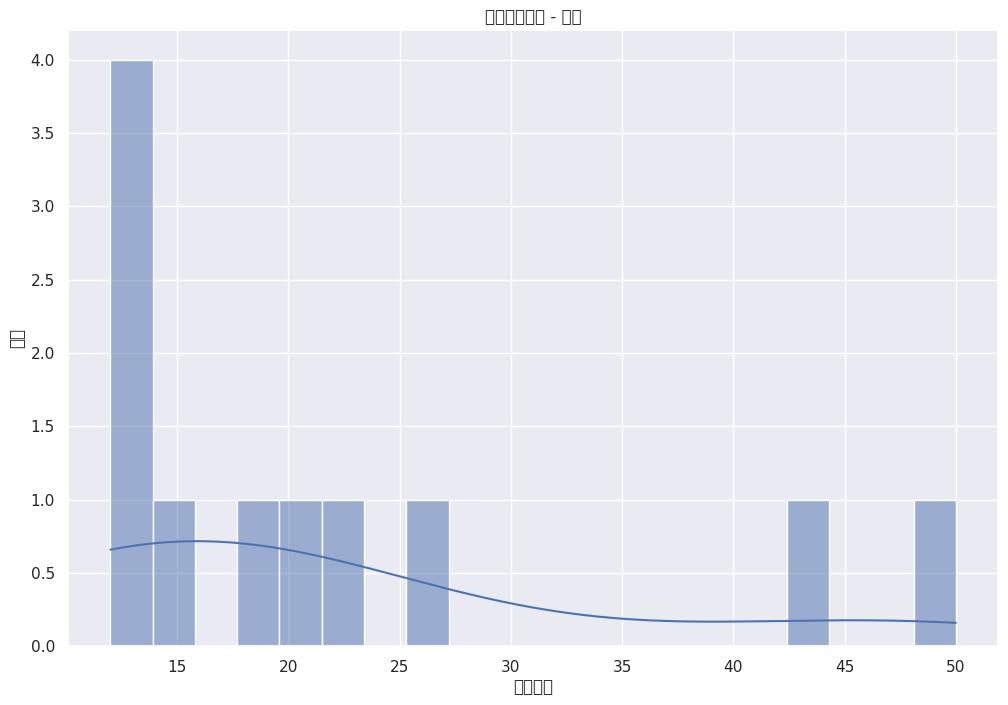

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mz/anaconda3/lib/python3.11/site-

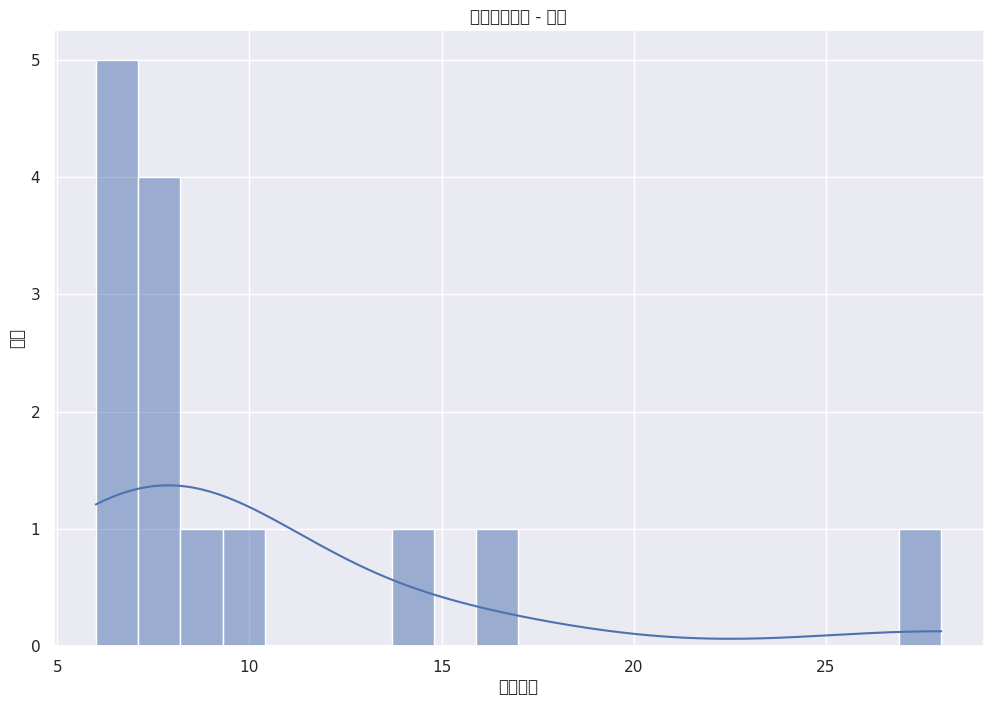

In [108]:
# # 遍历所有 sheet 页，绘制专业人数分布图
# for sheet_name, df in dataset.items():
#     plt.figure(figsize=(12, 8))
#     sns.histplot(df['专业人数'], bins=20, kde=True)
#     plt.title(f'专业人数分布 - {sheet_name}')
#     plt.xlabel('专业人数')
#     plt.ylabel('频数')
#     plt.show()

In [101]:
# import matplotlib.font_manager

# # 查看系统中已安装的字体
# fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# print(fonts)


['/System/Library/Fonts/Supplemental/Copperplate.ttc', '/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', '/System/Library/Fonts/Supplemental/Academy Engraved LET Fonts.ttf', '/System/Library/Fonts/Supplemental/Tamil MN.ttc', '/System/Library/Fonts/Supplemental/PartyLET-plain.ttf', '/System/Library/Fonts/Supplemental/Wingdings.ttf', '/System/Library/Fonts/Supplemental/NotoSansElbasan-Regular.ttf', '/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', '/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf', '/System/Library/Fonts/SFCamera.ttf', '/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', '/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', '/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', '/System/Library/Fonts/Supplemental/NotoSansMendeKikakui-Regular.ttf', '/System/Library/Fonts/Supplemental/Webdings.ttf', '/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf', '/System/Library/Fonts/Supplemental/STIXG

0. 数据预处理

In [1]:
import re

data = """
所学专业 添加
581 经济学关闭 
337 金融学关闭 
305 食品科学关闭 
285 计算机科学关闭 
247 计算科学关闭 
243 生物科学关闭 
217 动物学关闭 
203 工商管理关闭 
202 统计学关闭 
193 生物学关闭 
190 传播学关闭 
162 兽医学关闭 
154 电气与电子工程关闭 
152 数学关闭 
138 会计及相关服务关闭


"""

# 使用正则表达式提取数字和文字
#正则表达式为 (\d+)\s*([\u4e00-\u9fa5/]+)，其中 (\d+) 匹配数字，\s+ 匹配一个或多个空格， [\u4e00-\u9fa5] 匹配中文字符，([a-zA-Z/]+) 匹配文字
#matches = re.findall(r'(\d+)\s+([a-zA-Z/]+)', data)
#matches = re.findall(r'(\d+)\s*([\u4e00-\u9fa5/]+)', data)

#修改了匹配数字的部分，允许匹配逗号分隔的数字。
matches = re.findall(r'(\d{1,3}(?:,\d{3})*)\s+([\u4e00-\u9fa5a-zA-Z\s&()/-]+)', data)

# 打印结果
for match in matches:
    number, text = match
    text = text.replace("打开", "").replace("开启", "").replace("关闭", "")
    print("{} {}".format(text.strip(), number))  

经济学 581
金融学 337
食品科学 305
计算机科学 285
计算科学 247
生物科学 243
动物学 217
工商管理 203
统计学 202
生物学 193
传播学 190
兽医学 162
电气与电子工程 154
数学 152
会计及相关服务 138


In [2]:
import pandas as pd
from io import StringIO

# 输入数据
data_str = """
专业	专业人数
经济学	581
金融学	337
食品科学	305
计算机科学	285
计算科学	247
生物科学	243
动物学	217
工商管理	203
统计学	202
生物学	193
传播学	190
兽医学	162
电气与电子工程	154
数学	152
会计及相关服务	138
"""

# 将字符串转为DataFrame，去除专业人数中的逗号
#df = pd.read_csv(StringIO(data_str), sep='\t')
df = pd.read_csv(StringIO(data_str.replace(',', '')), sep='\t')


# 合并"食品科学"，"食品科学与工程"为"食品科学与工程"
# 合并"国际金融"，"银行与金融支持服务"，"金融学"为"金融学"
# 合并"信息技术"，"信息学/信息研究"，"计算机科学"为"计算机科学" 

# 将"会计与财务"替换为"会计学"
# 将"食品科学”替换为“食品科学与工程”
# 将"生物科学"替换为"生物学"


df['专业'] = df['专业'].replace({'食品科学': '食品科学与工程'})
df['专业'] = df['专业'].replace({'国际金融': '金融学', '银行与金融支持服务': '金融学'})
df['专业'] = df['专业'].replace({'会计与财务': '会计学'})


df['专业'] = df['专业'].replace({'生物科学': '生物学', '生物技术':'生物学'})
#生物化学与分子生物学, 生物统计学
df['专业'] = df['专业'].replace({'信息学/信息研究':'计算机科学', '计算科学':'计算机科学'})

df['专业'] = df['专业'].replace({'兽医技术员与兽医助理': '兽医学'})

df['专业'] = df['专业'].replace({'会计及相关服务': '会计学'})


df = df.groupby('专业', as_index=False).sum()

# 按专业人数从大到小排序
df = df.sort_values(by='专业人数', ascending=False)

# 打印结果
print(df)

         专业  专业人数
8       经济学   581
10    计算机科学   532
6       生物学   436
11      金融学   337
12  食品科学与工程   305
3       动物学   217
4      工商管理   203
9       统计学   202
1       传播学   190
2       兽医学   162
7   电气与电子工程   154
5        数学   152
0       会计学   138


合并备忘：

整体：
计算机科学，计算科学 -> 计算机科学
食品科学与工程，食品科学 -> 食品科学与工程
生物科学，生物技术 -> 生物科学

中国：
兽医技术员与兽医助理，兽医学：兽医学
食品科学与工程，食品科学：食品科学与工程

海外：
计算机科学，计算科学：计算机科学
生物科学，生物学：生物科学
会计及相关服务，会计学：会计学

美加：
计算机科学，计算科学：计算机科学
生物科学，生物学：生物科学

英荷：
会计学，会计与财务，会计及相关服务：会计学
金融学，食品科学与工程，生物科学，计算机科学

美东：
计算机科学，计算科学：计算机科学
食品科学与工程

美西：
计算机科学，计算科学：计算机科学
生物科学，生物学，生物技术：生物学
食品科学与工程

澳：
会计及相关服务 ，会计学：会计学
计算机科学 ，计算科学，信息技术  ：计算机科学 
食品科学 ，食品科学与工程 ：食品科学与工程

日新：
食品科学 ，食品科学与工程 ：食品科学与工程 
信息学/信息研究 ，计算机科学 ：计算机科学

## 1. 数据来源、选取、画像


1.1 数据来源领英，截止收集时间为2023/10/15

1.2 校友数据群体来自四类人群主体：

①英语程度较好，对外企感兴趣的国内校友

②出国留学，结交同学人脉，投递工作的留学生校友

③出国后在当地工作定居，拓展人脉和行业资源的海外校友

④从事互联网行业的校友

1.3 校友区域选择


选择校友人数最多，经济/留学/专业等具有代表性的各大洲区域：

①全球：包含中，美，加，英，荷，新加坡，校友各洲最大校友人数国

②中国：校友人数最多

②美加：海外最大校友人数国，经济具有代表性

③英荷：欧洲校友人数最多，经济具有代表性

④新加坡：亚洲第二大校友国，经济具有代表性

⑤澳洲：澳洲校友人数最多，专业具有代表性

1.4 数据局限性：
海外注册校友，工作经历停止收录阶段为在校期间科研经历较多。这可能和海外毕业后回国有关，或许导致海外校友教育类、研究类领域从事比例偏高。

领英平台为互联网社交招聘平台，平台职业资源在互联网及新型企业较多，可能吸引更多覆盖此部分专业同学注册，采样样本量和实际专业毕业人数、工作单位数量填写方面存在一定偏差。

## 2. 分析

## 2.1 地区

1.全球地区：
重点地区采样总人数3.1w人。校友分布前三大地区分别为中国(2.6w人，85%)，美洲，和欧洲。

2.中国地区：
集中在北上广深等一线城市，和南北方经济较发达地区如山东、江苏、浙江等地省份。其中国内校友，显示地为北京的校友占比70%，上海和广东次之，各占比10%以下。

3.海外地区：
美国为首位(3k人，10%)，英国，加拿大，澳大利亚，荷兰，新加坡各占比为1%左右。

4.美洲地区：
美国占比85%左右，加拿大占比15%。美国是美洲地区的最大校友地区。

5.美东地区：
纽约占比50%，华盛顿特区和波士顿各占比25%。纽约是美东地区的最大校友地区。

6.美西地区：
加州占比85%，华盛顿占比15%。加州是美东地区的最大校友地区。

7.欧洲地区：
英国占比60%，荷兰占比40%。英国是欧洲地区的最大校友地区。

## 2.2 专业

1.全球：

人数排名前列的专业分别为工商管理(2k, 16%)，食品科学与工程（1.8k, 15%），计算机科学（1.5k, 11%），文商类经济学和金融学（2.5k, 20%）。
传统优势学科如生物，农学等占比较少，原因可能为此类型专业机会与领英平台招聘渠道存在差异，导致注册人数少于预期。

2.国内：

人数排名前列的专业分别为工商管理(1.8k, 20%)，食品科学与工程（1.3k, 15%），兽医学（1k, 10%），金融学（800, 9%），计算机科学（800, 9%），经济学（700, 8%），会计学（550, 5%）。
国内文商科类，食品类，动医，计算机类在领英平台较为活跃，此类机会可能更容易在平台找到对应机会。

3.海外：

人数排名前列专业分别为经济学(550, 16%)，计算机科学(500, 15%)，生物科学(400, 11%)，金融学(300, 10%)，会计学(280, 8%)，食品科学与工程等(280, 8%)。
选择海外就读的校友，对以上专业的选择存在偏好，可能与此类专业在海外的学业优势有关。

4.美加：

人数排名前三的专业为经济学(500, 17%)，计算机(430, 15%)，生物科学(350, 12%)。
美加地区校友偏好选择文商类，计算机类，生物类等专业。

5.美东：

人数排名前三的专业为经济学(200, 25%)，金融学(100, 10%)，计算机科学(100，10%)。
美东校友更偏好文商科和金融类，这可能与该地区专业就业优势相关。

6.美西：

人数排名前三的专业为计算机科学(150, 25%)，生物科学(100, 15%)，经济学(70, 10%)。
美西校友更偏好计算机类，这可能与该地区专业就业优势相关。

7.英荷：

人数排名前三的专业为会计学(90, 16%)，国际金融(60, 11%)，工商管理(50, 10%)。
欧洲地区校友偏好选择会计类，金融类，商业类学科。计算机科学类在该地区仅占3%左右，和其他地区计算机专业选择偏好存在差异。

8.澳大利亚：

人数排名前三的专业为会计学(50, 20%)，计算机科学(45,17%)，食品科学与工程(25,10%)。
澳洲地区校友偏好选择会计类，计算机类，和食品类学科。

9.新加坡：

人数排名前三的专业为食品科学与工程(20, 20%)，计算机类(15, 15%)，金融学(10, 10%)。
新加坡地区校友偏好选择食品类，计算机类，和金融学类学科。新加坡的食品专业是各地区中唯一出现偏好第一的专业。

## 2.3 领域

1.全球：

人数排名前列的领域分别为研究(2.7k, 15%)，运营(2.5k, 13%)，教育(2.1k, 10%)，销售(2.1k, 10%)，工程(2k, 10%)。

全球校友在教育研究类领域较多，其次是运营，销售和工程类。这可能与校友所在地区就业资源丰富种类、毕业校友科研水平较高等因素有关。


2.国内：

人数排名前列的领域分别为运营(2.2k, 15%)，销售(2k, 13%)，工程(1.5k, 10%)，研究(1.5k, 10%)，教育(1.5k, 10%)。

这与国内文商科类专业校友较多趋于一致。

3.海外：

人数排名前列的领域分别为研究(1.1k, 30%)，教育(500, 15%)，工程(450, 10%)，业务开发(280, 7%)，信息技术(200, 6%)。

海外校友就业偏好与计算机科学类校友较多趋于一致。

国内校友更侧重在运营销售的领域，海外校友更侧重在教育研究和工程领域。原因可能与不同地区就业机会种类丰富程度不同，海外注册校友停留阶段为在校期间科研经历较多，和海外毕业后进入海外教研领域有关。


4.美加：


人数排名前列领域为研究(1k, 35%)，教育(400, 13%)，工程(400, 13%)，业务开发(200, 7%)，信息技术(170, 6%)。

这可能与美加地区计算机类就业优势较明显相关，同时在该地区高校及科研机构任职的教授人数较多。侧面反映当地劳动力缺口偏好和身份政策倾向。


5.美东：

人数排名前列的专业为研究(200, 35%)，工程(65, 10%)，教育(65, 10%)，业务开发(50, 8%)，财务/金融(50, 8%)。

这可能与美东地区校友更偏好的文商科和金融类专业成正相关关系。

6.美西：

人数排名前列的专业为研究(190, 30%)，工程(130, 20%)，信息技术(50, 8%)，教育(40, 7%)，运营(40, 7%)。

这可能与美西地区校友更偏好计算机类专业成正相关关系。

7.英荷：

排名前列的领域为教育(100, 23%)，研究(85, 20%)，业务开发(45, 10%)，运营(35, 8%)，信息技术(25, 5%)，销售(25, 5%)，工程(25, 5%)。

运营领域和销售领域人数占比，相较美加地区更加突出。这可能与欧洲地区校友偏好选择会计类，金融类，商业类学科相关。


8.澳大利亚：

排名前列的领域为研究(35, 15%)，教育(25, 11%)，业务开发(20, 10%)，运营(20, 10%)，销售(20, 10%)，工程(20, 10%)，信息技术(15, 8%)。

澳洲运营领域和销售领域人数占比，相较美加地区更加突出，与欧洲领域结构更相似。


9.新加坡：

排名前列的领域为研究(20, 20%)，业务开发(15, 15%)，工程(10, 10%)，销售(10, 10%)，运营(8, 8%)。

这与新加坡地区作为亚洲金融和科技中心的定位一致，和计算机和金融类专业校友人数偏好一致。领域结构与澳洲和欧洲更为类似。

## 2.4 公司

1.全球：

数据集中的校友公司主要集中在：互联网类(字节跳动，百度，腾讯，亚马逊等)，硬件类(华为，联想)，生物医药类(拜耳)，农业类(先正达种业)，食品快消类（玛氏，雀巢），金融类(德勤)等。


2.国内：

校友公司领域结构与全球领域结构一致，国内教育研究类(中国科学院，北大)，食品类(伊利)名列榜单。


3.海外：

教育研究类(荷兰瓦格宁根大学，普渡大学，佛罗里达大学，威斯康辛麦迪逊分校，哈佛医学院等），互联网类（亚马逊，谷歌，脸书）。

海外校友公司偏好与学校长期较好合作关系、专业优势类的教育类学校，和互联网企业。

同时这与不同地区就业机会种类丰富程度不同，海外注册校友停留阶段在在校期间科研经历较多，和海外毕业后进入海外教研领域有关。


4.美加：

美加地区因校友人数和就业人数在整体海外校友中比重较大，故美加地区与海外校友整体就业公司结构类似。

这可能与美加地区计算机类专业和就业优势较明显相关，同时在该地区高校及科研机构任职的教授人数较多。侧面反映当地劳动力缺口偏好和身份政策倾向。


5.美东：

除教育研究类外，生物医药类（美国食品药品监督管理局，默克，再生元制药），医疗类（美国国立卫生研究所，麻省总医院），金融（安永）也在公司名单中占比较大。

这可能与美东地区生物、医学、金融类型就业资源较为丰富有关。

6.美西：

除教育研究类（加州戴维斯分校，斯坦福医学院等）外，互联网企业（谷歌，亚马逊，脸书，苹果，微软，抖音），生物医药类（吉利德制药，基因泰克）也在公司名单中占比较大。

这可能与美西地区互联网企业就业资源较为丰富，美西校友更偏好计算机类专业有关。

7.英荷：

教育研究类（瓦格宁根大学，帝国理工，剑桥大学等），食品快消类（联合利华，雀巢），金融类（德勤)名列榜单。

这可能与欧洲地区优势就业资源相关。


8.澳大利亚：

教育研究类（墨尔本大学，昆士兰大学等），农业类（孟山都种业，家乐氏谷物），金融类（西太平洋银行，澳大利亚联邦银行），政府类（新南威尔士规划环境设计管理部门）名列榜单。

这可能与澳洲地区优势就业资源相关。


9.新加坡：

教育研究类（新加坡国立大学，新加坡南洋理工大学，分子生物学研究所），化工类（奇华顿化工），农业类（丰益国际农业），互联网类（脸书），金融类（安永，汇丰）名列榜单。

这可能与新加坡地区作为亚洲金融和科技中心的优势就业资源一致，和该地区计算机和金融类专业校友人数偏好一致。